In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from mlp_with_shortcut import Network, get_accuracy

In [27]:
np.random.seed(42)
data = np.array(pd.read_csv("data/car_data/car_evaluation_with_one_hot.csv"))
data_x = data[:, 0:6]
data_y = data[:, -4:]
n_samples = data.shape[0]

dim_in = 6
dim_hidden_1 = 14
dim_hidden_2 = 34
dim_out = 4

learning_rate = 0.007
n_epochs = 16
batch_size = 13

n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

# data shuffling
perm = np.random.permutation(n_samples)

# train-test partition
train_indx = perm[:n_train]
test_indx = perm[n_train:]

data_x_train, data_y_train = data_x[train_indx, :], data_y[train_indx]
data_x_test, data_y_test = data_x[test_indx, :], data_y[test_indx]

data_x_train = data_x_train.T
data_x_test = data_x_test.T


In [28]:
model = Network(dim_in, dim_hidden_1, dim_hidden_2, dim_out, learning_rate, batch_size)
start = time.time()
history_softmax = model.fit(data_x_train, data_y_train, data_x_test, data_y_test, n_epochs, 'Softmax')
end = time.time()
start = time.time()
history_tanh = model.fit(data_x_train, data_y_train, data_x_test, data_y_test, n_epochs, 'Tanh')
end = time.time()

  0%|                                | 0/16 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.623 Test acc: 0.684


  0%|                                | 0/16 [00:00<?, ?it/s]C:\Users\kzorina\Studing\DL\neural_net_from_scratch\mlp_with_shortcut.py:127: RuntimeWarning: invalid value encountered in log
  log_likelihood = -np.sum(np.multiply(y_true,np.log(self.y_pred.T)))


Epoch: 0 Loss: nan Test acc: 0.765


100%|███████████████████████| 16/16 [00:00<00:00, 27.76it/s]


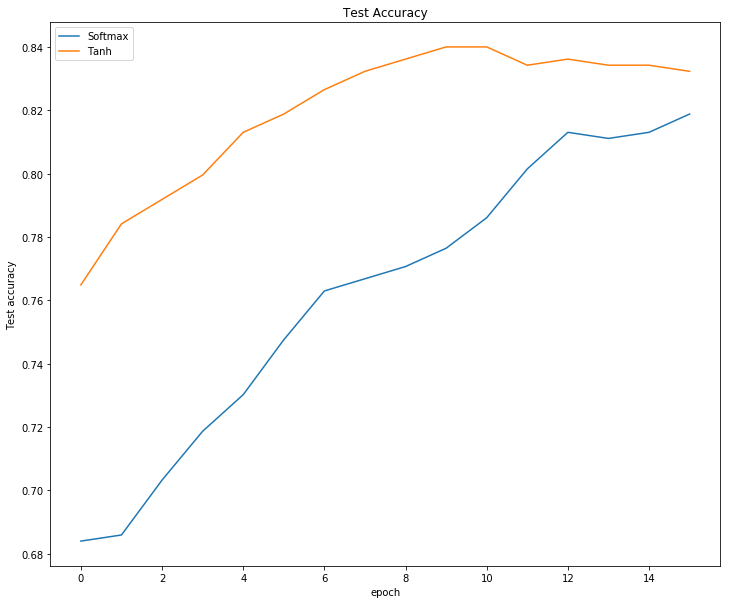

In [29]:
plt.figure(figsize=[12, 10])
plt.xlabel('epoch')
plt.ylabel('Test accuracy')
plt.title('Test Accuracy')
plt.plot(history_softmax['test_accuracy'])
plt.plot(history_tanh['test_accuracy'])
plt.legend(['Softmax', 'Tanh'], loc='upper left')
plt.show()